In [1]:
from scipy.stats import norm

proportion = round(norm.cdf(-2.13),3)
print(f'proportion = {proportion}')

z = round(norm.ppf(proportion),3)
print(f'z = {z}')

proportion = 0.017
z = -2.12


#### 4.2 For the past year I have spent about $4.00 a day for lunch, give or take a quarter or so.
a. Draw a rough sketch of this distribution of daily expenditures.

b. If, without looking at the bill, I paid for my lunch with a 5 dollar bill and received $.75 in change, should I worry that I was overcharged?

c. Explain the logic involved in your answer to part (b).

(array([10., 12., 29., 47., 62., 59., 45., 27.,  6.,  3.]),
 array([3.36354556, 3.49360291, 3.62366026, 3.7537176 , 3.88377495,
        4.0138323 , 4.14388965, 4.27394699, 4.40400434, 4.53406169,
        4.66411903]),
 <BarContainer object of 10 artists>)

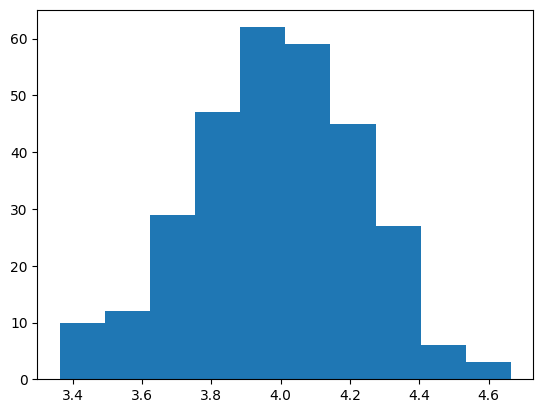

In [2]:
import matplotlib.pyplot as plt
import numpy as np
mean = 4
sd = 0.25
expenditure = np.random.normal(mean,sd,300)

plt.hist(expenditure)

#### 4.7 A recently admitted class of graduate students at a large state university has a mean Graduate Record Exam verbal score of 650 with a standard deviation of 50. (The scores are reasonably normally distributed.) One student, whose mother just happens to be on the board of trustees, was admitted with a GRE score of 490. Should the local newspaper editor, who loves scandals, write a scathing editorial about favoritism?

In [3]:
from scipy.stats import norm
mean = 650
sd = 50
X = 490
z = (X-mean)/sd
print(f'z = {z}')

proportion = round(norm.cdf(z),5)
print(f'proportion = {proportion}')

z = -3.2
proportion = 0.00069


#### Permutations - when arrangement is considered

$P_r^{N}=\dfrac{N!}{(N-r)!}$

#### Combinations - when arrangement is not considered

$C_r^{N}=\dfrac{N!}{r!(N-r)!}$

#### 5.26 In a study of human cognition, we want to look at recall of different classes of words (nouns, verbs, adjectives, and adverbs). Each subject will see one of each. We are afraid that there may be a sequence effect, however, and want to have different subjects see the different classes in a different order. How many subjects will we need if we are to have one subject per order?

In [4]:
from itertools import permutations, combinations
list =['nouns', 'verbs', 'adjectives', 'adverbs']

count1 = 0
for item in permutations(list,4):
    count1 += 1
print(count1)

count2 = 0
for item in combinations(list,2):
    count2 += 1
print(count2)

list2 = [n for n in range(1,20)]
count3 = 0
for n in permutations(list2,6):
    # print(n)
    count3 += 1
print(f'count3 = {count3}')

24
6
count3 = 19535040


#### 5.28 In a learning task, a subject is presented with five buttons. He must learn to press three specific buttons in a predetermined order. What chance does that subject have of pressing correctly on the first trial?

In [5]:
from itertools import permutations, combinations

list = [i for i in range(1,6)]
count = 0
for n in permutations(list,3):
    count+=1
print(f'probability = 1/{count} of getting it correct at the first try')

probability = 1/60 of getting it correct at the first try


#### 5.30 We are designing a study in which six external electrodes will be implanted in a rat’s brain. The six-channel amplifier in our recording apparatus blew two channels when the research assistant took it home to run her stereo. How many different ways can we record from the brain? (It makes no difference what signal goes on which channel.)

In [6]:
from itertools import permutations, combinations

electrodes = [ch for ch in range(6)]
print(len(electrodes))
count = 0
for elc in permutations(electrodes, 4):
    count+=1
print(f'Number of recording ways = {count}')

6
Number of recording ways = 360


In [7]:
from scipy.stats import binom

# Parameters
n = 20  # Total number of questions
p = 0.5  # Probability of success (guessing correctly)

# Calculate the probability of getting 11 or more correct answers
probability = 1 - binom.cdf(10, n, p)

print("Probability of getting 11 or more correct answers by random guessing:", probability)


Probability of getting 11 or more correct answers by random guessing: 0.41190147399902344


#### 5.36 At age 40, 1% of women can be expected to have breast cancer. Of those women with breast cancer, 80% will have positive mammographies. In addition, 9.6% of women who do not have breast cancer will have a positive mammography. If a woman in this age group tests positive for breast cancer, what is the probability that she actually has it. Use Bayes’ theorem to solve this problem. (Hint: Letting BC stand for “breast cancer,” we have p(BC) 5 .01, p(1|BC) 5 .80, and p(1| BC) 5 .096. You want to solve for p(BC|1).)

Refer to path: Statistics_Training/Statistics_Witte/Statistics_Populations_Sample_Probability.ipynb

In [8]:
# Define the probabilities
p_cancer = 0.01  # Probability of having breast cancer
p_pos_given_cancer = 0.80  # Probability of a positive mammogram given cancer
p_pos_given_no_cancer = 0.096  # Probability of a positive mammogram given no cancer

# Calculate the probability of a positive mammogram
p_pos = (p_cancer * p_pos_given_cancer) + ((1 - p_cancer) * p_pos_given_no_cancer)

# Calculate the probability of having cancer given a positive mammogram using Bayes' theorem
p_cancer_given_pos = (p_cancer * p_pos_given_cancer) / p_pos

print("Probability of having breast cancer given a positive mammogram:", p_cancer_given_pos*100)

Probability of having breast cancer given a positive mammogram: 7.763975155279504


#### 6.3 You have a theory that if you ask subjects to sort one-sentence characteristics of people (e.g., “I eat too fast”) into five piles ranging from “not at all like me” to “very much like me,” the percentage of items placed in each of the five piles will be approximately 10, 20, 40, 20, and 10. You have one of your friend’s children sort 50 statements, and you obtain the following data: [8, 10, 20, 8, 4] Do these data support your hypothesis?

$\chi^2=\dfrac{\Sigma(O-E)^2}{E}$

In [9]:
from scipy.stats import chisquare

# Expected percentages for each category
expected_percentages = [10, 20, 40, 20, 10]

# Total number of items
total_items = 50

# Calculate expected frequencies based on expected percentages
expected_frequencies = [percentage * total_items / 100 for percentage in expected_percentages]

# Observed frequencies (from the data)
observed_frequencies = [8, 10, 20, 8, 4]

# Perform chi-square goodness of fit test
chi2, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: The observed distribution significantly differs from the expected distribution.")
else:
    print("Fail to reject null hypothesis: The observed distribution does not significantly differ from the expected distribution.")

Chi-square statistic: 2.4000000000000004
p-value: 0.6626272662068446
Fail to reject null hypothesis: The observed distribution does not significantly differ from the expected distribution.


In [10]:
print(((8-10)**2)/10)
print(((10-20)**2)/20)
print(((20-40)**2)/40)
print(((8-20)**2)/20)
print(((4-10)**2)/10)

0.4
5.0
10.0
7.2
3.6


In [13]:
# 512 (494.49)
# 227 (230.65)
# 59 (64.65)
# 18 (26.21)
# 54 (71.51)
# 37 (33.35)
# 15 (9.35)
# 12 (3.79)
# list = [[512,494.49],[227,230.65],[59,64.65],[18,26.21],[54,71.51],[37,33.35],[15,9.35],[12,3.79]]
list = [[8,10],[10,20],[20,40],[8,20],[4,10]]

result = [(item[0]-item[1])**2/item[1] for item in list]
print(sum(result))

26.200000000000003
